In [ ]:
from google.colab import drive
from os import walk
import os

drive.mount("/content/drive", force_remount=True)

path = '/content/drive/My Drive/Fresh_and_Stale_medium'

Mounted at /content/drive


In [ ]:
image_dict = {}

from pathlib import Path
from tqdm import tqdm
import pandas as pd
import os

file_names = []
labels = []

for file in sorted((Path(path).glob('*/*.*'))):
    label = str(file).split('/')[-2]  #class name from  path
    labels.append(label)
    file_names.append(str(file))  # Add the file path to the list

print(len(file_names), len(labels))

df = pd.DataFrame.from_dict({"image": file_names, "label": labels})
print(df.shape)

7038 7038
(7038, 2)


In [ ]:
from torchvision import datasets, transforms
import numpy as np
from torch.utils.data.sampler import WeightedRandomSampler
from torchvision.datasets import ImageFolder

#Defining tranforms for dataset
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

dataset = ImageFolder(path, transform=transform)

In [ ]:
from torch.utils.data import random_split

main_dataset, = random_split(dataset, [len(dataset)])

In [ ]:
import torch
dataset.targets = torch.tensor([main_dataset.dataset.targets[i] for i in main_dataset.indices]).numpy().tolist()
dataset.label = torch.tensor([main_dataset.dataset.samples[i][1] for i in main_dataset.indices]).numpy().tolist()

In [ ]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 64, num_workers=2)

In [ ]:
from torchvision import models

model=models.resnet18(pretrained=False)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


10 / 110
20 / 110
30 / 110
40 / 110
50 / 110
60 / 110
70 / 110
80 / 110
90 / 110
100 / 110
110 / 110
generating t-SNE plot...


<ipython-input-9-31ddec18ce54>:40: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(


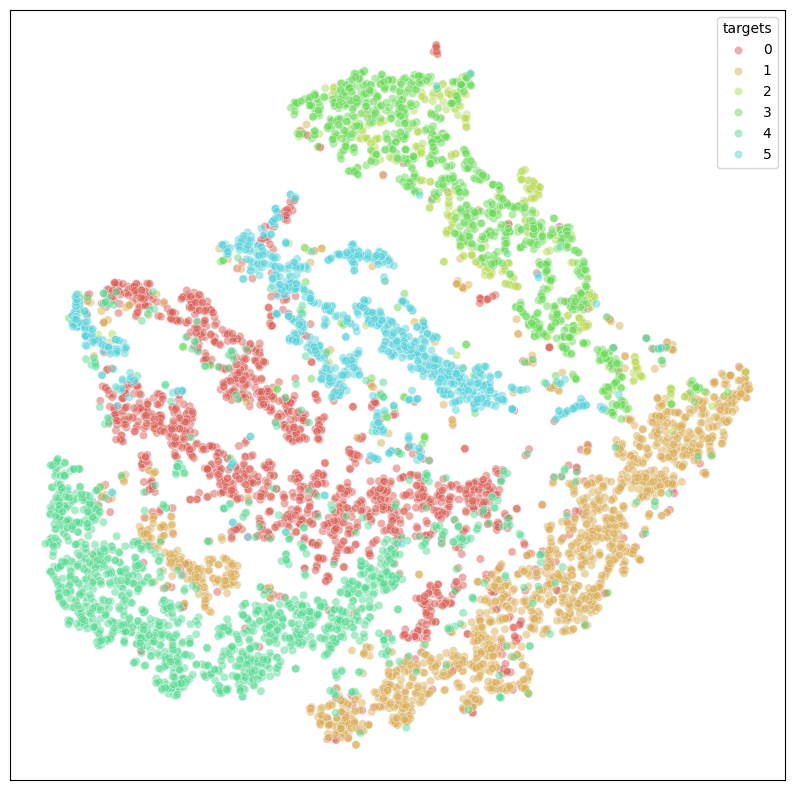

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

def gen_features():
    model.eval()
    targets_list = []
    outputs_list = []

    with torch.no_grad():
        for idx, (inputs, targets) in enumerate(dataloader):
            inputs = inputs.to(device)
            targets = targets.to(device)
            targets_np = targets.data.cpu().numpy()

            outputs = model(inputs)
            outputs_np = outputs.data.cpu().numpy()

            targets_list.append(targets_np[:, np.newaxis])
            outputs_list.append(outputs_np)

            if ((idx+1) % 10 == 0) or (idx+1 == len(dataloader)):
                print(idx+1, '/', len(dataloader))

    targets = np.concatenate(targets_list, axis=0)
    outputs = np.concatenate(outputs_list, axis=0).astype(np.float64)

    return targets, outputs

def tsne_plot(targets, outputs):
    print('generating t-SNE plot...')
    # tsne_output = bh_sne(outputs)
    tsne = TSNE(random_state=0)
    tsne_output = tsne.fit_transform(outputs)

    df = pd.DataFrame(tsne_output, columns=['x', 'y'])
    df['targets'] = targets

    plt.rcParams['figure.figsize'] = 10, 10
    sns.scatterplot(
        x='x', y='y',
        hue='targets',
        palette=sns.color_palette("hls", 10),
        data=df,
        marker='o',
        legend="full",
        alpha=0.5
    )

    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')

targets, outputs = gen_features()
tsne_plot(targets, outputs)

In [ ]:
model = models.alexnet(pretrained=False)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


10 / 110
20 / 110
30 / 110
40 / 110
50 / 110
60 / 110
70 / 110
80 / 110
90 / 110
100 / 110


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


110 / 110
generating t-SNE plot...


<ipython-input-11-31ddec18ce54>:40: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(


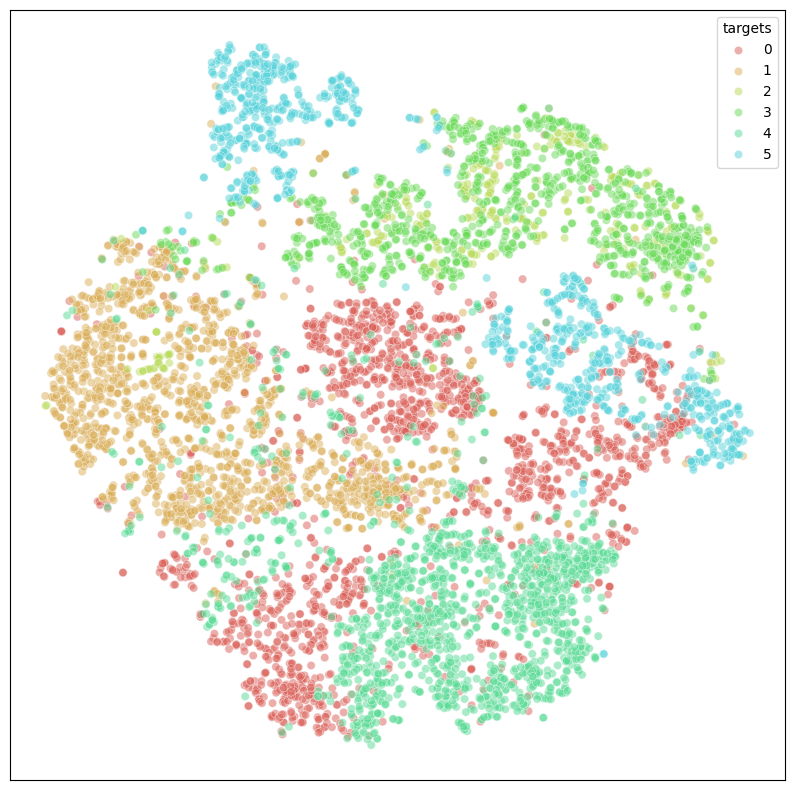

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

def gen_features():
    model.eval()
    targets_list = []
    outputs_list = []

    with torch.no_grad():
        for idx, (inputs, targets) in enumerate(dataloader):
            inputs = inputs.to(device)
            targets = targets.to(device)
            targets_np = targets.data.cpu().numpy()

            outputs = model(inputs)
            outputs_np = outputs.data.cpu().numpy()

            targets_list.append(targets_np[:, np.newaxis])
            outputs_list.append(outputs_np)

            if ((idx+1) % 10 == 0) or (idx+1 == len(dataloader)):
                print(idx+1, '/', len(dataloader))

    targets = np.concatenate(targets_list, axis=0)
    outputs = np.concatenate(outputs_list, axis=0).astype(np.float64)

    return targets, outputs

def tsne_plot(targets, outputs):
    print('generating t-SNE plot...')
    # tsne_output = bh_sne(outputs)
    tsne = TSNE(random_state=0)
    tsne_output = tsne.fit_transform(outputs)

    df = pd.DataFrame(tsne_output, columns=['x', 'y'])
    df['targets'] = targets

    plt.rcParams['figure.figsize'] = 10, 10
    sns.scatterplot(
        x='x', y='y',
        hue='targets',
        palette=sns.color_palette("hls", 10),
        data=df,
        marker='o',
        legend="full",
        alpha=0.5
    )

    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')

targets, outputs = gen_features()
tsne_plot(targets, outputs)